# *합성곱 신경망*
 ## 6. CNN 시각화하기

### 1) 1번째 층의 가중치 시각화하기

- 1번층의 가중치의 형상은 (30, 1, 5, 5) 로, 필터의 크기가 5 X 5고, 채널이 1개로 구성
- 이는 1채널의 회색조 이미지로 시각화 가능

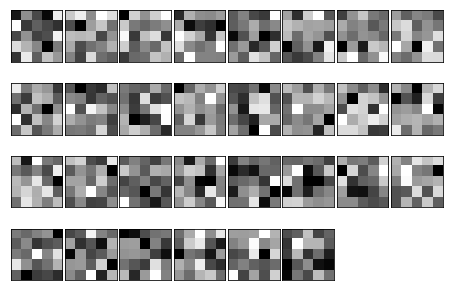

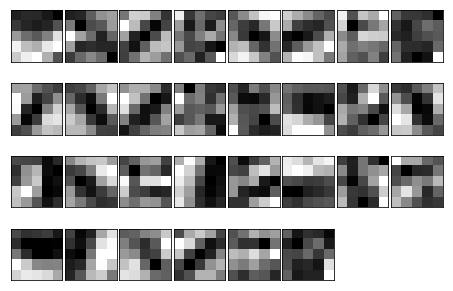

In [2]:
# coding: utf-8
import matplotlib.pyplot as plt
from data.simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

- 위 그림에서 상단은 학습 전 가중치 필터의 이미지를, 하단은 학습 후 가중치 필터의 이미지를 표현
- 학습 전 가중치 필터는 무작위로 초기화 되는 반면, 학습 후 필터는 규칙성 있는 이미지로 변환
- 이는 "색의 경계"나 "색이 뭉친 지역"을 판별하는 기준이 되며 이를 "Edge" + "Blob"으로 표현
![](image/fig 7-25.png)
___

### 2) 층 깊이에 따른 추출정보 변화

- 딥러닝 시각화에 관한 연구에 따르면, 계층이 깊어질수록 추출되는 정보는 더 추상화 됨
- 예를 들어 8층으로 구현한 AlexNet의 경우, 층이 깊어질수록 더 복잡하고 추상화된 정보가 추출
- AlexNet의 3번째 층은 "질감(texture)"을, 5번째 층은 "사물의 특징 일부(object parts)"를, 마지막 8번째 층은 "사물 클래스 특성(object class)"를 표현
- 다시 말해, 층이 깊어질수록 사물의 의미를 이해하도록 변화
![](image/fig 7-26.png)